a280_NNHwith2OPT

Iteration 533: Improved total distance to 1215.48
Iteration 579: Improved total distance to 1205.60
Iteration 1982: Improved total distance to 1204.09
Iteration 1992: Improved total distance to 1194.93
Iteration 2007: Improved total distance to 1191.73
Iteration 2347: Improved total distance to 1191.42
Iteration 2740: Improved total distance to 1179.83
Iteration 3215: Improved total distance to 1178.25
Iteration 3765: Improved total distance to 1171.62
Iteration 4288: Improved total distance to 1171.62
Iteration 4315: Improved total distance to 1165.89
Iteration 4318: Improved total distance to 1153.89
Iteration 4402: Improved total distance to 1136.35
Iteration 4668: Improved total distance to 1119.98
Iteration 5239: Improved total distance to 1119.38
Iteration 6347: Improved total distance to 1116.41
Iteration 7096: Improved total distance to 1113.74
Iteration 7165: Improved total distance to 1106.91
Iteration 7855: Improved total distance to 1106.70
Iteration 7911: Improved total di

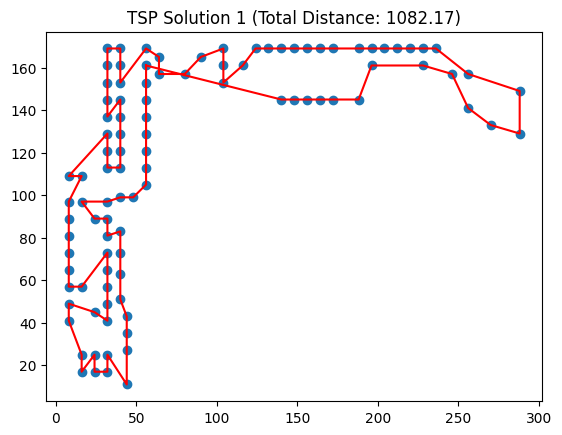

Iteration 1450: Improved total distance to 1246.95
Iteration 2205: Improved total distance to 1246.81
Iteration 2275: Improved total distance to 1244.41
Iteration 2344: Improved total distance to 1233.69
Iteration 2479: Improved total distance to 1228.99
Iteration 2545: Improved total distance to 1227.57
Iteration 2610: Improved total distance to 1225.73
Iteration 3250: Improved total distance to 1222.22
Iteration 3295: Improved total distance to 1216.48
Iteration 3939: Improved total distance to 1200.10
Iteration 4629: Improved total distance to 1192.77
Iteration 4658: Improved total distance to 1184.10
Iteration 4683: Improved total distance to 1177.09
Iteration 4704: Improved total distance to 1168.10
Iteration 4721: Improved total distance to 1161.99
Iteration 4734: Improved total distance to 1152.10
Iteration 4745: Improved total distance to 1147.77
Iteration 4786: Improved total distance to 1147.00
Iteration 5856: Improved total distance to 1134.53
Iteration 7995: Improved total 

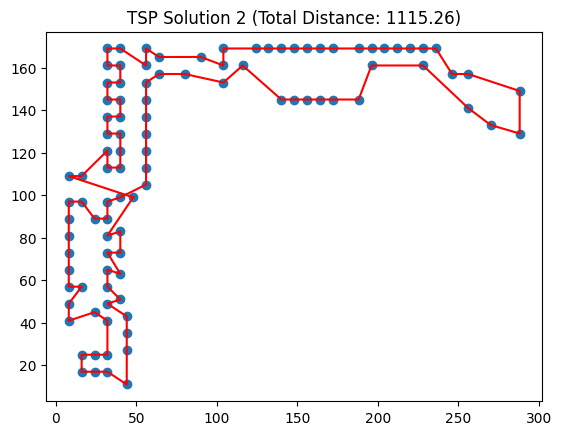

Iteration 82: Improved total distance to 1193.55
Iteration 201: Improved total distance to 1189.22
Iteration 845: Improved total distance to 1168.43
Iteration 1352: Improved total distance to 1167.11
Iteration 1623: Improved total distance to 1158.66
Iteration 1632: Improved total distance to 1158.55
Iteration 2365: Improved total distance to 1152.81
Iteration 3219: Improved total distance to 1136.43
Iteration 4274: Improved total distance to 1132.66
Iteration 4818: Improved total distance to 1123.66
Iteration 6582: Improved total distance to 1119.34
Iteration 8342: Improved total distance to 1119.11
Iteration 8804: Improved total distance to 1113.91
Iteration 8877: Improved total distance to 1113.71
Iteration 9682: Improved total distance to 1113.71
Iteration 9683: Improved total distance to 1108.65
Iteration 11259: Improved total distance to 1105.83
Iteration 13136: Improved total distance to 1101.73
Iteration 13594: Improved total distance to 1097.05


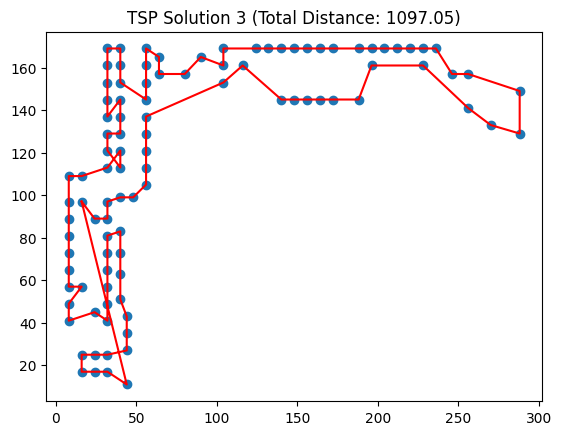

Iteration 573: Improved total distance to 1165.45
Iteration 1754: Improved total distance to 1149.45
Iteration 3460: Improved total distance to 1147.38
Iteration 3478: Improved total distance to 1073.29
Iteration 3490: Improved total distance to 1063.40
Iteration 5322: Improved total distance to 1059.08
Iteration 5323: Improved total distance to 1056.86


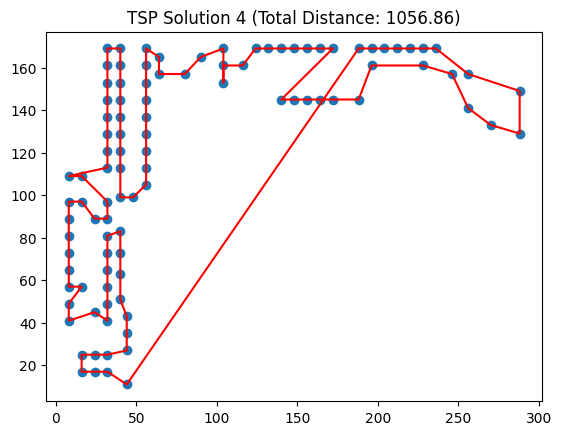

Iteration 8: Improved total distance to 1224.01
Iteration 439: Improved total distance to 1220.47
Iteration 752: Improved total distance to 1218.96
Iteration 762: Improved total distance to 1209.81
Iteration 777: Improved total distance to 1206.61
Iteration 1192: Improved total distance to 1206.30
Iteration 1675: Improved total distance to 1194.71
Iteration 2270: Improved total distance to 1193.12
Iteration 2985: Improved total distance to 1186.50
Iteration 3492: Improved total distance to 1180.35
Iteration 3765: Improved total distance to 1174.24
Iteration 4346: Improved total distance to 1167.85
Iteration 4347: Improved total distance to 1146.97
Iteration 4668: Improved total distance to 1130.59
Iteration 5941: Improved total distance to 1127.92
Iteration 6025: Improved total distance to 1121.10
Iteration 6880: Improved total distance to 1120.88
Iteration 6951: Improved total distance to 1118.44
Iteration 9011: Improved total distance to 1116.02
Iteration 9417: Improved total distanc

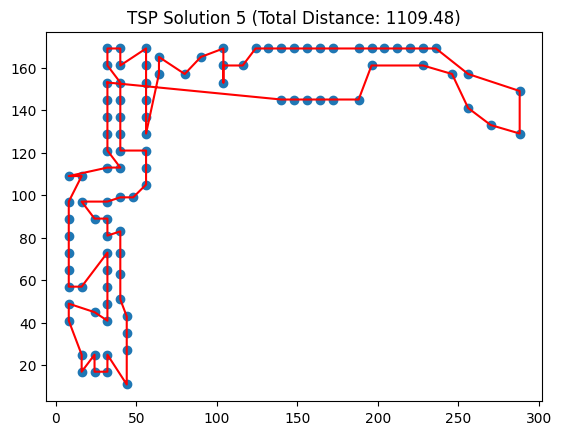

Average Tour Length: 1092.1646117274536
Time taken to render: 89.00806546211243 seconds


In [2]:
import re
import numpy as np
import matplotlib.pyplot as plt
import time

class TSPSolver:
    def __init__(self, points):
        self.points = np.array(points)
        self.n = len(points)
        self.tour = None

    def nearest_neighbor(self, start=None):
        if start is None:
            start = np.random.randint(0, self.n)
        unvisited = set(range(self.n))
        unvisited.remove(start)
        tour = [start]

        while unvisited:
            current_city = tour[-1]
            nearest_city = min(unvisited, key=lambda city: np.linalg.norm(self.points[current_city] - self.points[city]))
            tour.append(nearest_city)
            unvisited.remove(nearest_city)

        self.tour = tour

    def total_distance(self, tour=None):
        if tour is None:
            tour = self.tour
        return sum(np.linalg.norm(self.points[tour[i]] - self.points[tour[i + 1]]) for i in range(self.n - 1))

    def two_opt_swap(self, tour, i, k):
        new_tour = tour[:i] + tour[i:k + 1][::-1] + tour[k + 1:]
        return new_tour

    def two_opt(self, tour=None):
        if tour is None:
            tour = self.tour

        improvement = True
        iteration = 0
        while improvement:
            improvement = False
            for i in range(1, self.n - 2):
                for k in range(i + 1, self.n):
                    iteration += 1
                    if k - i == 1:
                        continue  # Changes nothing, skip
                    new_tour = self.two_opt_swap(tour, i, k)
                    if self.total_distance(new_tour) < self.total_distance(tour):
                        tour = new_tour
                        improvement = True
                        print(f"Iteration {iteration}: Improved total distance to {self.total_distance(tour):.2f}")

        self.tour = tour

    def solve(self):
        self.nearest_neighbor()
        self.two_opt()
        # Connect the last city back to the starting city to form a closed tour
        self.tour.append(self.tour[0])

# Parse the TSP dataset and extract coordinates
def parse_tsp_dataset(data):
    coordinates = []
    pattern = re.compile(r'\s+(\d+)\s+(\d+)\s+(\d+)')

    in_node_coord_section = False
    for line in data.split('\n'):
        if line.startswith("NODE_COORD_SECTION"):
            in_node_coord_section = True
            continue
        if line.startswith("EOF"):
            break
        if in_node_coord_section:
            match = pattern.match(line)
            if match:
                coordinates.append((float(match.group(2)), float(match.group(3))))

    return coordinates

# Load the TSP dataset from a file
def load_tsp_file(file_path):
    with open(file_path, 'r') as file:
        tsp_data = file.read()
    return tsp_data

# Specify the path to your TSP file
tsp_file_path = "a280.tsp"

# Load the TSP dataset from the file
tsp_data = load_tsp_file(tsp_file_path)

# Parse the dataset and extract coordinates
city_coordinates = parse_tsp_dataset(tsp_data)

# Store total distances
total_distances = []

start_time = time.time()

# Rerun TSP solving process 5 times
for i in range(5):
    # Create TSPSolver instance and solve
    solver = TSPSolver(city_coordinates)
    solver.solve()

    # Calculate total distance and add to list
    total_distance = solver.total_distance()
    total_distances.append(total_distance)

    # Plot the solution
    plt.figure()
    plt.scatter(solver.points[:, 0], solver.points[:, 1])
    tour_points = np.array([solver.points[i] for i in solver.tour])
    plt.plot(tour_points[:, 0], tour_points[:, 1], 'r-')
    plt.title(f'TSP Solution {i+1} (Total Distance: {total_distance:.2f})')
    plt.show()

# Calculate and print average tour length and time taken to render
average_tour_length = np.mean(total_distances)
end_time = time.time()
rendered_time = end_time - start_time
print("Average Tour Length:", average_tour_length)
print("Time taken to render:", rendered_time, "seconds")


a280_NNHonly

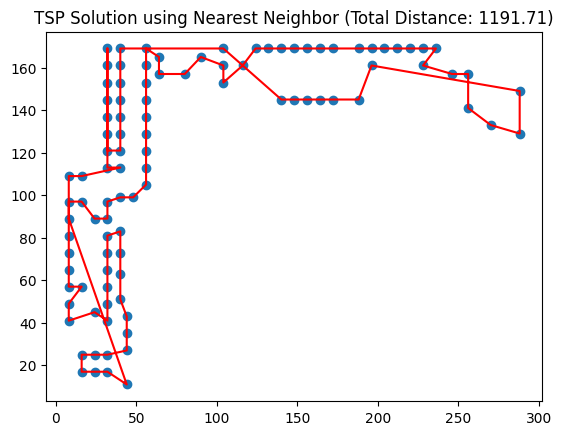

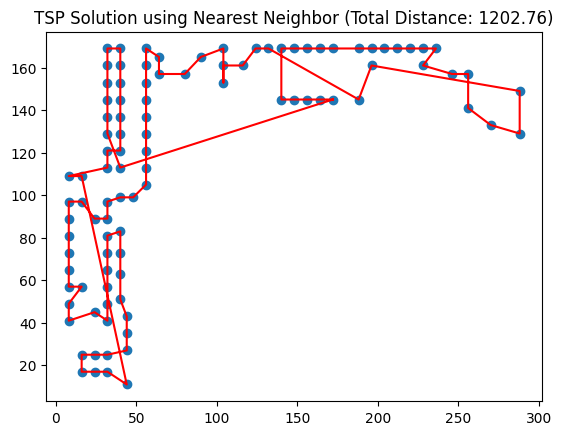

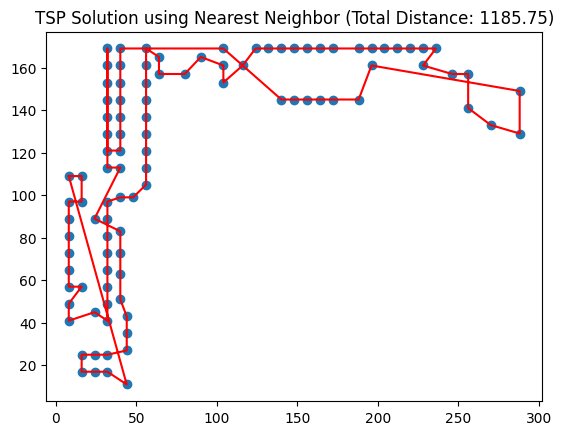

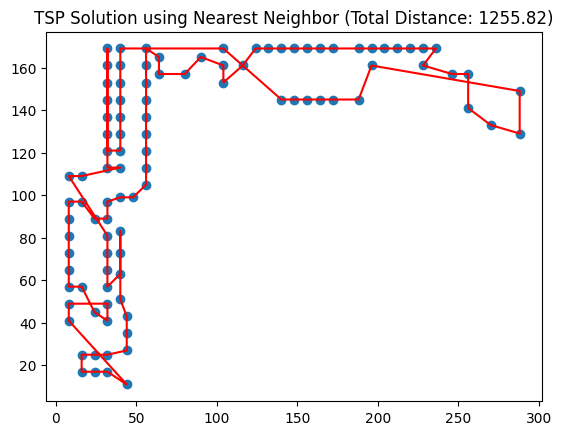

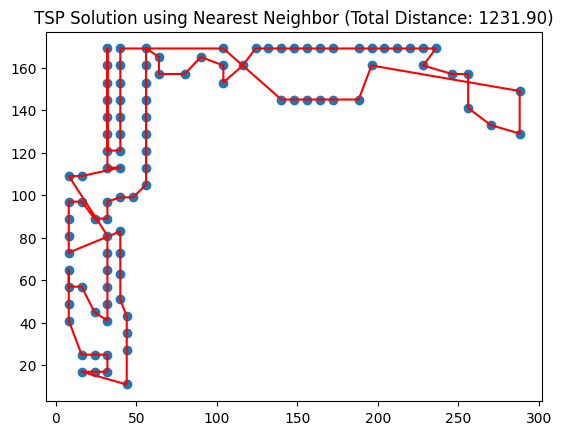

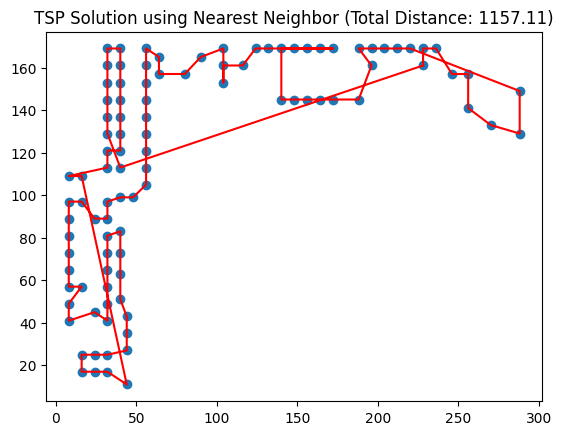

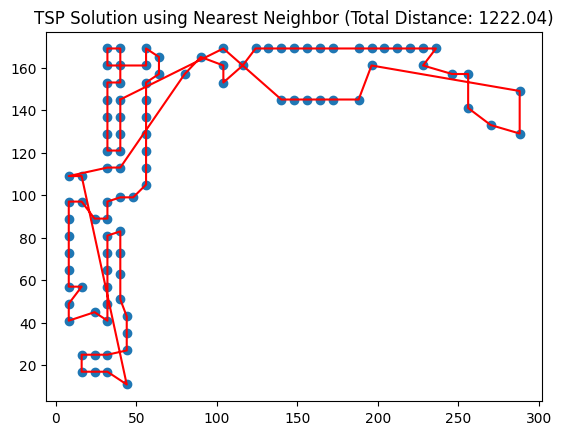

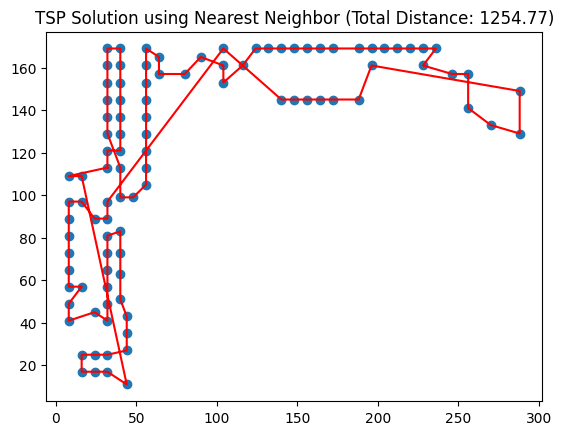

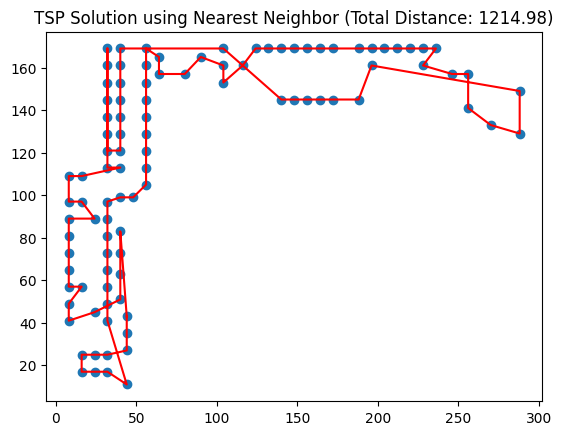

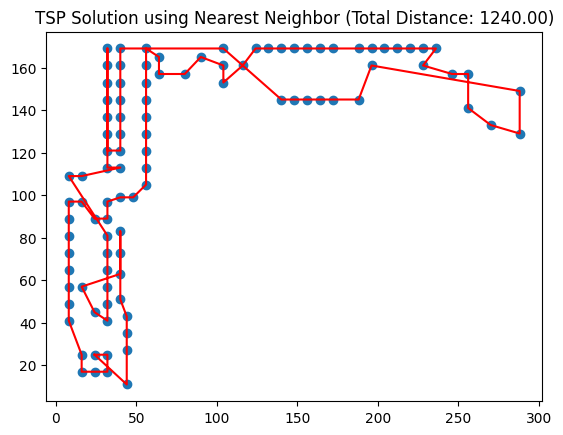

Average Tour Length: 1215.6849197362383
Time taken to render: 2.973851203918457 seconds


In [3]:
import re
import numpy as np
import matplotlib.pyplot as plt
import time

class TSPSolver:
    def __init__(self, points):
        self.points = np.array(points)
        self.n = len(points)
        self.tour = None

    def nearest_neighbor(self, start=None):
        if start is None:
            start = np.random.randint(0, self.n)
        unvisited = set(range(self.n))
        unvisited.remove(start)
        tour = [start]

        while unvisited:
            current_city = tour[-1]
            nearest_city = min(unvisited, key=lambda city: np.linalg.norm(self.points[current_city] - self.points[city]))
            tour.append(nearest_city)
            unvisited.remove(nearest_city)

        self.tour = tour

    def total_distance(self, tour=None):
        if tour is None:
            tour = self.tour
        return sum(np.linalg.norm(self.points[tour[i]] - self.points[tour[i + 1]]) for i in range(self.n - 1))

    def solve(self):
        self.nearest_neighbor()
        # Connect the last city back to the starting city to form a closed tour
        self.tour.append(self.tour[0])

# Parse the TSP dataset and extract coordinates
def parse_tsp_dataset(data):
    coordinates = []
    pattern = re.compile(r'\s+(\d+)\s+(\d+)\s+(\d+)')

    in_node_coord_section = False
    for line in data.split('\n'):
        if line.startswith("NODE_COORD_SECTION"):
            in_node_coord_section = True
            continue
        if line.startswith("EOF"):
            break
        if in_node_coord_section:
            match = pattern.match(line)
            if match:
                coordinates.append((float(match.group(2)), float(match.group(3))))

    return coordinates

# Load the TSP dataset from a file
def load_tsp_file(file_path):
    with open(file_path, 'r') as file:
        tsp_data = file.read()
    return tsp_data

# Specify the path to your TSP file
tsp_file_path = "a280.tsp"

# Load the TSP dataset from the file
tsp_data = load_tsp_file(tsp_file_path)

# Parse the dataset and extract coordinates
city_coordinates = parse_tsp_dataset(tsp_data)

# Create TSPSolver instance and solve using nearest neighbor
total_distances = []

start_time = time.time()
for i in range(10):
    solver = TSPSolver(city_coordinates)
    solver.solve()
    total_distance = solver.total_distance()
    total_distances.append(total_distance)
    # Plot the solution
    plt.figure()
    plt.scatter(solver.points[:, 0], solver.points[:, 1])
    tour_points = np.array([solver.points[i] for i in solver.tour])
    plt.plot(tour_points[:, 0], tour_points[:, 1], 'r-')
    plt.title(f'TSP Solution using Nearest Neighbor (Total Distance: {total_distance:.2f})')
    plt.show()

# Calculate and print average tour length and time taken to render
average_tour_length = np.mean(total_distances)
end_time = time.time()
rendered_time = end_time - start_time
print("Average Tour Length:", average_tour_length)
print("Time taken to render:", rendered_time, "seconds")


a280_NNHwith3OPT

Iteration 338: Improved total distance to 1201.30
Iteration 43506: Improved total distance to 1197.90
Iteration 80065: Improved total distance to 1191.05
Iteration 143392: Improved total distance to 1171.81
Iteration 147431: Improved total distance to 1169.97
Iteration 147481: Improved total distance to 1168.46
Iteration 196276: Improved total distance to 1162.11
Iteration 297229: Improved total distance to 1134.85
Iteration 430211: Improved total distance to 1134.80
Iteration 573643: Improved total distance to 1123.32


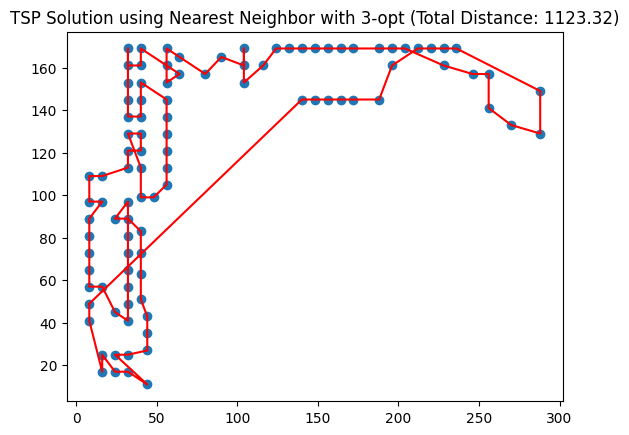

Iteration 14188: Improved total distance to 1190.71
Iteration 38639: Improved total distance to 1184.73
Iteration 97533: Improved total distance to 1181.11
Iteration 97590: Improved total distance to 1175.57
Iteration 188677: Improved total distance to 1174.63
Iteration 230083: Improved total distance to 1159.53
Iteration 230975: Improved total distance to 1157.20
Iteration 237807: Improved total distance to 1152.17
Iteration 240778: Improved total distance to 1136.27
Iteration 295057: Improved total distance to 1135.63


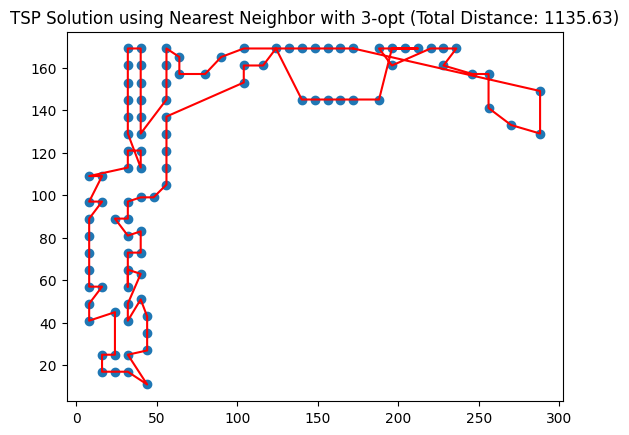

Iteration 130024: Improved total distance to 1071.22


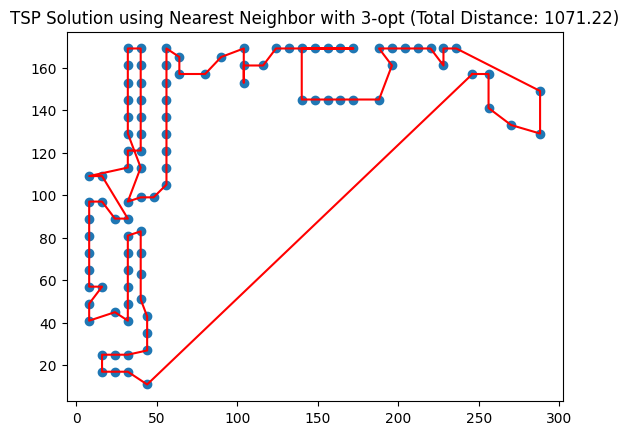

Average Tour Length: 1110.06


In [6]:
import re
import numpy as np
import matplotlib.pyplot as plt
import random

class TSPSolver:
    def __init__(self, points):
        self.points = np.array(points)
        self.n = len(points)
        self.tour = None

    def nearest_neighbor(self, start=None):
        if start is None:
            start = np.random.randint(0, self.n)
        unvisited = set(range(self.n))
        unvisited.remove(start)
        tour = [start]

        while unvisited:
            current_city = tour[-1]
            nearest_city = min(unvisited, key=lambda city: np.linalg.norm(self.points[current_city] - self.points[city]))
            tour.append(nearest_city)
            unvisited.remove(nearest_city)

        self.tour = tour

    def total_distance(self, tour=None):
        if tour is None:
            tour = self.tour
        return sum(np.linalg.norm(self.points[tour[i]] - self.points[tour[i + 1]]) for i in range(self.n - 1))

    def three_opt_swap(self, tour, i, j, k):
        new_tour = tour[:i] + tour[j:k+1][::-1] + tour[i:j] + tour[k+1:]
        return new_tour

    def three_opt(self, tour=None):
        if tour is None:
            tour = self.tour

        improvement = True
        iteration = 0
        while improvement:
            improvement = False
            for i in range(self.n - 4):
                for j in range(i + 2, self.n - 2):
                    for k in range(j + 2, self.n):
                        iteration += 1
                        if random.random() < 0.1:  # Adjust this probability as needed
                            new_tour = self.three_opt_swap(tour, i, j, k)
                            if self.total_distance(new_tour) < self.total_distance(tour):
                                tour = new_tour
                                improvement = True
                                print(f"Iteration {iteration}: Improved total distance to {self.total_distance(tour):.2f}")

        self.tour = tour

    def solve(self):
        self.nearest_neighbor()
        self.three_opt()
        # Connect the last city back to the starting city to form a closed tour
        self.tour.append(self.tour[0])

# Parse the TSP dataset and extract coordinates
def parse_tsp_dataset(data):
    coordinates = []
    pattern = re.compile(r'\s+(\d+)\s+(\d+)\s+(\d+)')

    in_node_coord_section = False
    for line in data.split('\n'):
        if line.startswith("NODE_COORD_SECTION"):
            in_node_coord_section = True
            continue
        if line.startswith("EOF"):
            break
        if in_node_coord_section:
            match = pattern.match(line)
            if match:
                coordinates.append((float(match.group(2)), float(match.group(3))))

    return coordinates

# Load the TSP dataset from a file
def load_tsp_file(file_path):
    with open(file_path, 'r') as file:
        tsp_data = file.read()
    return tsp_data

# Specify the path to your TSP file
tsp_file_path = "a280.tsp"

# Load the TSP dataset from the file
tsp_data = load_tsp_file(tsp_file_path)

# Parse the dataset and extract coordinates
city_coordinates = parse_tsp_dataset(tsp_data)

# Store total distances for three runs
total_distances = []

# Run the solver three times
for _ in range(3):
    solver = TSPSolver(city_coordinates)
    solver.solve()
    total_distance = solver.total_distance()
    total_distances.append(total_distance)

    # Plot the solution for each run
    plt.scatter(solver.points[:, 0], solver.points[:, 1])
    tour_points = np.array([solver.points[i] for i in solver.tour])
    plt.plot(tour_points[:, 0], tour_points[:, 1], 'r-')
    plt.title(f'TSP Solution using Nearest Neighbor with 3-opt (Total Distance: {total_distance:.2f})')
    plt.show()

# Calculate and print the average total distance
average_distance = sum(total_distances) / len(total_distances)
print(f"Average Tour Length: {average_distance:.2f}")
